In [1]:
import autorootcwd

In [2]:
import os
import json
import pandas as pd
import umap.umap_ as umap
import pandas as pd
import numpy as np
import plotly.express as px
import re

In [3]:
path = "data/telegram"

In [4]:
def load_json_files(path):
    data = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    json_data = json.load(f)
                    data.append(json_data)
    return data

json_data = load_json_files(path)

In [5]:
len(json_data)

7048

In [6]:
df = pd.concat([pd.DataFrame(d) for d in json_data], ignore_index=True)
df

,message_id,text,user_id,username,first_name,last_name,is_bot,channel_id,channel_name,timestamp,embedding
0,185417972657485,Yah. But live in Thailand.,2100502412,Pandananda5555,555,None,False,1854179726,Print Gains,2023-12-06 03:42:12+00:00,"[-0.019972428679466248, 0.027694208547472954, ..."
1,185417972657486,Oh smart,1975528577,dieudepeur,Bryson,None,False,1854179726,Print Gains,2023-12-06 03:42:17+00:00,"[-0.019045554101467133, 0.011075451970100403, ..."
2,185417972657336,easy mode is all,5508703743,MissionGains,MissionGains,None,False,1854179726,Print Gains,2023-12-06 03:10:08+00:00,"[-0.004679414443671703, -0.02087654359638691, ..."
3,1862898215334773,[**🔥 #6 Proficy Trending**](https://t.me/Profi...,5457577145,ProficyPriceBot,Proficy Price Bot,None,True,1862898215,Based Boys,2023-12-06 03:10:09+00:00,"[-0.020067181438207626, -0.0055284760892391205..."
4,185417972657338,Fake suzhu,2100502412,Pandananda5555,555,None,False,1854179726,Print Gains,2023-12-06 03:10:33+00:00,"[-0.03863881900906563, -0.008237403817474842, ..."
...,...,...,...,...,...,...,...,...,...,...,...
15080,1862898215325108,So on Hilo you often won the pool by just buyi...,595473187,None,O.G.,None,False,1862898215,Based Boys,2023-11-25 22:31:10+00:00,"[-0.05718585476279259, -0.034345027059316635, ..."
15081,1862898215325110,Yeah,1730020651,None,J,None,False,1862898215,Based Boys,2023-11-25 22:31:26+00:00,"[-0.017132798209786415, 0.01108916662633419, 0..."
15082,20894251206517,still in that lol,1252164884,None,iofy,None,False,2089425120,Swingers-Haven,2023-11-25 22:31:40+00:00,"[0.009609599597752094, 0.012081215158104897, 0..."
15083,1862898215325111,LOL,1313215373,None,R28,None,False,1862898215,Based Boys,2023-11-25 22:31:43+00:00,"[0.018325716257095337, 0.0023045502603054047, ..."


In [7]:
df.isnull().sum()

message_id          0
text                0
user_id           304
username         6959
first_name        335
last_name       12481
is_bot            335
channel_id          0
channel_name        0
timestamp           0
embedding           0
dtype: int64

In [8]:
df.iloc[:, :-1].nunique()

message_id      15058
text            13762
user_id          1246
username          565
first_name       1168
last_name         281
is_bot              3
channel_id         11
channel_name       11
timestamp       14279
dtype: int64

In [9]:
percent_unique = (df.iloc[:, :-1].nunique() / len(df)) * 100
percent_unique

message_id      99.821014
text            91.229698
user_id          8.259861
username         3.745442
first_name       7.742791
last_name        1.862778
is_bot           0.019887
channel_id       0.072920
channel_name     0.072920
timestamp       94.656944
dtype: float64

In [10]:
df['is_bot'].value_counts()[True] / len(df) * 100

10.076234670202187

In [11]:
df = df[df['is_bot'] == False]
len(df)

13228

In [12]:
embeddings = df.embedding.tolist()
texts = df.text.tolist()

In [13]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings)

/Users/ash/opt/miniconda3/envs/bigd/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [14]:
df_umap = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
df_umap['text'] = texts

In [15]:
fig = px.scatter(df_umap, x='x', y='y', 
                 hover_data=[df.text])  # Shows index or any other info on hover
fig.update_traces(marker=dict(size=3))

fig.update_layout(width=1200, height=1200)
fig.show()


In [16]:
top_100_longest_texts = df['text'].str.len().nlargest(100)
print(top_100_longest_texts)

5232     2181
11466    2125
13481    1939
7288     1686
10263    1529
         ... 
1415      370
9794      367
660       361
137       359
361       359
Name: text, Length: 100, dtype: int64


In [17]:
# # Extract tickers from text without numbers and make it case-insensitive
# tickers = df['text'].str.findall(r'\$[A-Za-z]+', flags=re.IGNORECASE)

# # Flatten the list of tickers
# tickers = [item.lower() for sublist in tickers for item in sublist]

# # Count the occurrences of each ticker
# ticker_counts = pd.Series(tickers).value_counts()

# # Sort the tickers by number of mentions
# sorted_tickers = ticker_counts.sort_values(ascending=False)

# # Create a new dataframe with ticker counts and display the head
# ticker_df = pd.DataFrame({'ticker': sorted_tickers.index, 'count': sorted_tickers.values})
# ticker_df['ticker'] = ticker_df['ticker'].str.upper()
# ticker_df.head(20)

In [26]:
# Step 1: Extract Tickers and Channel IDs
# Extract tickers while making them case-insensitive and without numbers
df['tickers'] = df['text'].str.findall(r'\$[A-Za-z]+', flags=re.IGNORECASE)

# Step 2: Normalize and Pair Tickers with Channel IDs
# Normalize tickers to upper case and pair them with channel_id
pairs = df.apply(lambda x: [(ticker.upper(), x['channel_id']) for ticker in x['tickers']], axis=1)

# Flatten the list of pairs
flat_pairs = [item for sublist in pairs for item in sublist]

# Convert to DataFrame
pairs_df = pd.DataFrame(flat_pairs, columns=['ticker', 'channel_id'])

# Step 3: Count Unique Channel IDs for Each Ticker
# Group by ticker and count unique channel_ids
grouped = pairs_df.groupby('ticker')['channel_id'].nunique()

# Count the total mentions of each ticker
total_mentions = pairs_df['ticker'].value_counts()

# Step 4: Create a Summary DataFrame
# Create a new DataFrame
ticker_summary_df = pd.DataFrame({
    'ticker': grouped.index, 
    'total_mentions': total_mentions[grouped.index].values,
    'unique_channel_count': grouped.values, 
})

# Sort the ticker_summary_df by total_mentions
sorted_ticker_summary = ticker_summary_df.sort_values(by='total_mentions', ascending=False)
sorted_ticker_summary.head(20).reset_index(drop=True)

/var/folders/hr/mm7jf8w56k35td255_gx2l840000gn/T/ipykernel_98935/3497683371.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ticker,total_mentions,unique_channel_count
0,$PURDO,11,1
1,$GROK,10,4
2,$FEAR,9,1
3,$ZETA,8,3
4,$HOLE,8,2
5,$GEC,7,2
6,$ROSE,7,2
7,$RBT,6,1
8,$DEAL,6,3
9,$HMND,6,2


/var/folders/hr/mm7jf8w56k35td255_gx2l840000gn/T/ipykernel_98935/2616682705.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



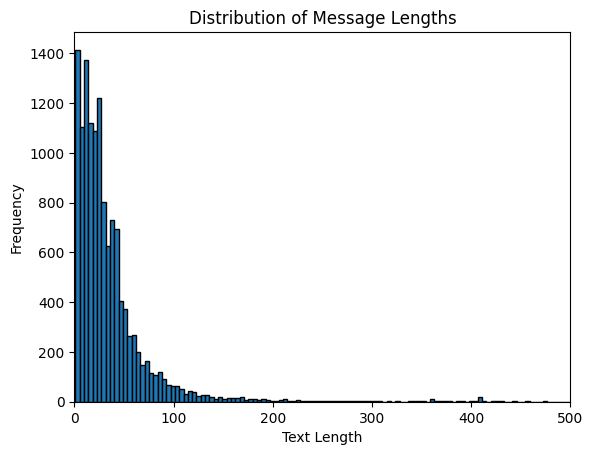

In [33]:
import matplotlib.pyplot as plt

# Generate histogram of text lengths
df['text_length'] = df['text'].str.len()
plt.hist(df['text_length'], bins=500, edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Message Lengths')
plt.xlim(0, 500)  # Set x-axis limits
plt.show()